In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [8]:
data = yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


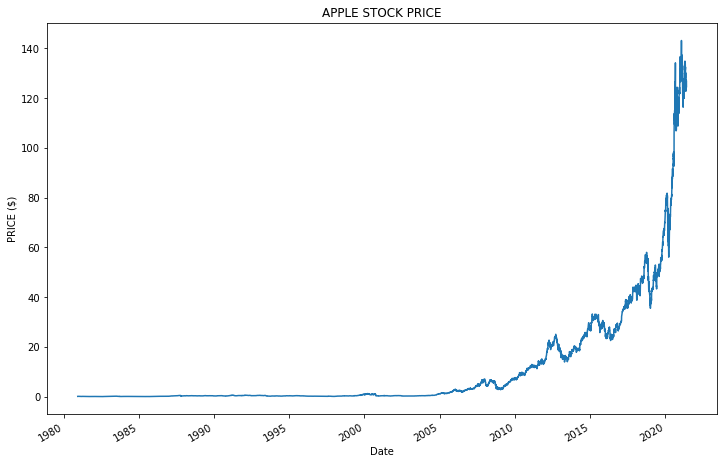

In [13]:
data["Close"].plot(title="APPLE STOCK PRICE", figsize=(12,8))
plt.ylabel("PRICE ($)")
plt.show()

In [16]:
def CAGR(DF):
    df = DF.copy()
    df["daily_ret"] = df["Adj Close"].pct_change()
    df["cum_ret"] = (1 + df["daily_ret"]).cumprod()
    n = len(df)/252
    CAGR = (df["cum_ret"][-1])**(1/n) - 1
    return CAGR

In [17]:
CAGR(data)

0.1922933910082285

In [24]:
def volatility(DF):
    df = DF.copy()
    df["daily_ret"] = df["Adj Close"].pct_change()
    vol = df["daily_ret"].std() * np.sqrt(252)
    return vol

In [25]:
volatility(data)

0.4534875472330651

In [27]:
def sharpe(DF, rf):
    df = DF.copy()
    df["daily_ret"] = df["Adj Close"].pct_change()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

In [29]:
sharpe(data, 0.0105)

0.4008784631847845

In [43]:
def sortino(DF, rf):
    df = DF.copy()
    df["daily_ret"] = df["Adj Close"].pct_change()
    neg_vol = df[df["daily_ret"]<0]["daily_ret"].std() * np.sqrt(252)
    sr = (CAGR(df) - rf)/neg_vol
    return sr

In [44]:
sortino(data, 0.0105)

0.5541605344364999